In [57]:
import mmh3
import math
import random
import string
import matplotlib.pyplot as plt

In [110]:
class CountingBloomFilter:
    
    #The filter takes as input memory size and number of hash functions, and offers an optimization option
    def __init__(self,m,k,optimize=True):
        #Optimization makes sure the array size is prime, to avoid every hashed value that's a multiple of n overlapping.
        if optimize:
            while not all(m % i for i in xrange(2, m)):
                m += 1
        self.m = m
        self.k = k
        self.n = 0
        self.a = []
        #initialize array with zeros
        for i in range(0, self.m):
            self.a.append(0)
        #keep track of total keys added for convenience
        self.t = 0
            
    #This function hashes a key and returns a list of pointers to the main array   
    def hash_indices(self, key):
        indices = []
        for i in range(1, self.k + 1):
            index_list.append((hash(key) + i * mmhash(key)) % self.m)
        return indices
    
    #This function adds a key to the filter
    def add(self, key):
        #Use hash_indices to get a list of pointers
        for i in self.hash_indices(key):
            #increment array at pointers
            self.a[i] += 1
        self.t += 1
     
    #This function deletes a key from the filter
    def delete(self, key):
        #Operates similarly to add, but decerements array
        for i in self.hash_indices(key):
            self.a[i] -= 1
        self.t -= 1
    
    #This function tests whether a key is not in the filter, or probably in the filter
    def test(self, key):
        #Returns false if any hashed value of key is still 0, true otherwise
        for i in self.hash_indices(key):
            if self.a[i] <= 0:
                return False
        return True
    
    #This function counts the maximum possible number of times a key has been added to the filter.
    def count(self, key):
        #chooses maximum possible value for initial minimum
        minimum = self.t
        #finds minimum value at all pointers and returns it
        if self.test(key):
            for i in self.hash_indices(key):
                if self.a[i] < minimum:
                    minimum = self.a[i]
            return minimum
        #if the key is absent from the filter, returns 0 
        else:
            return 0

In [152]:
class CountingBloom2:
    
    def __init__(self, n, k, fp_rate):
        """
        Calculates desired array size as a function of k,
        number of items to be stored and the desired fp_rate
        and ensures that self.bits is assigned a prime number.
        """
        bits = (- n * k) / math.log(1 - fp_rate**(1 / float(k)))
        bits = int(round(bits))
        while not all(bits % i for i in xrange(2, bits)):
            bits += 1
        self.bits = bits # number of bits in the array
        self.fp_rate = fp_rate 
        self.k = k # number of hash functions to be used
        self.items = 0 # number of items already stored
        self.array = [] 
        self.zero_array()
        
    def zero_array(self):
        """
        Initializing the array.
        """
        for i in range(0, self.bits):
            self.array.append(0)
            
    def get_hash_indexes(self, key):
        """
        Double hashes the key k times and returns
        a list of indexes for the key.
        """
        index_list = []  
        for i in range(1, self.k + 1):
            index_list.append((hash(key) + i * mmhash(key)) % self.bits)
        return index_list
    
    def add(self, key):
        """
        Takes the k indexes that the hash produces
        and increments all of them once. Also increases
        total item count.
        """
        for i in self.get_hash_indexes(key):
            self.array[i] += 1
        self.items += 1
        
    def remove(self, key):
        """
        Like self.add, but decrements counts instead.
        """
        for i in self.get_hash_indexes(key):
            self.array[i] -= 1
        self.items -= 1
        
    def member(self, key):
        """
        Checks if the item in the array exists. 
        """
        for i in self.get_hash_indexes(key):
            if self.array[i] <= 0:
                return False
        return True
    
    def count(self, key):
        """
        Returns lowest count of all k hash indexes. If
        keys don't overlap significantly, this should 
        accurately represent the key count.
        """
        temp_min = self.items
        if self.member:
            for i in self.get_hash_indexes(key):
                if self.array[i] < temp_min:
                    temp_min = self.array[i]
            return temp_min
        else:
            return 0

3575
4689
6005
6787
7382
7970
8260
8626
9143
9181
9271
9413
9854
9645
9741
9940
10000
10000


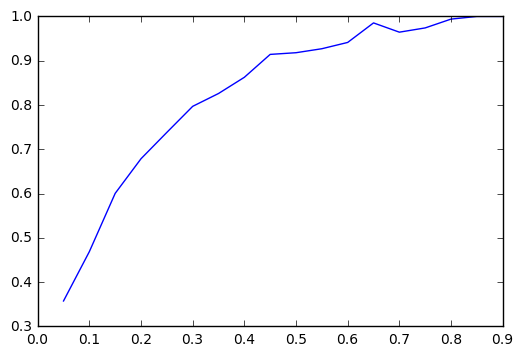

In [154]:
expected = [x * 0.05 for x in range(1, 19)]
truth = []

for j in expected:   
    f = CountingBloom2(500,5,j)
    for i in range(1000):
        f.add(''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(5)))
    count = 0
    for i in range(10000):
        if f.member(''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(5))):
            count += 1
    truth.append((float(count)/10000))
    print count
    
plt.plot(expected,truth)
plt.show()

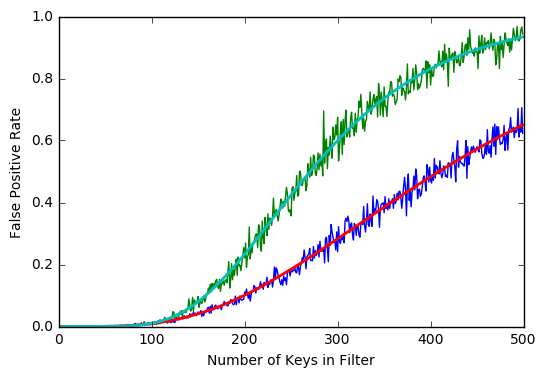

In [162]:
elements = range(1,500)
expected_1 = [math.pow(1.0 - math.exp((-5*float(x))/1000), 5) for x in elements]
fp_1 = []
expected_2 = [math.pow(1.0 - math.exp((-10*float(x))/1000), 10) for x in elements]
fp_2 = []

for j in elements:   
    f = CountingBloom(1000,5)
    for i in range(j):
        f.add(''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(5)))
    count = 0
    for i in range(1000):
        if f.member(''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(5))):
            count += 1
    fp_1.append((float(count)/1000))                    

for j in elements:   
    f = CountingBloom(1000,10)
    for i in range(j):
        f.add(''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(5)))
    count = 0
    for i in range(1000):
        if f.member(''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(5))):
            count += 1
    fp_2.append((float(count)/1000))    
    
plt.plot(elements,fp_1)
plt.plot(elements,fp_2)
plt.plot(elements,expected_1,linewidth=2)
plt.plot(elements,expected_2,linewidth=2)
plt.xlabel("Number of Keys in Filter")
plt.ylabel("False Positive Rate")
plt.show()